<a href="https://colab.research.google.com/github/sds4670/ML_PRACTICE/blob/main/ML_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


1.Load the Auto MPG dataset using an appropriate Python library.

In [ ]:
# Load dataset
df = sns.load_dataset("mpg")
df.tail(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


2.Identify and handle missing values, if any, using a suitable technique.

In [ ]:
df.isnull().sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


3.*Treat*:
○ Vehicle weight as the independent variable
○ Fuel efficiency (mpg) as the dependent variable

In [ ]:
X = df[["weight"]]   # must be 2D
y = df["mpg"]


4. Visualize the relationship between vehicle weight and mpg using a scatter plot.

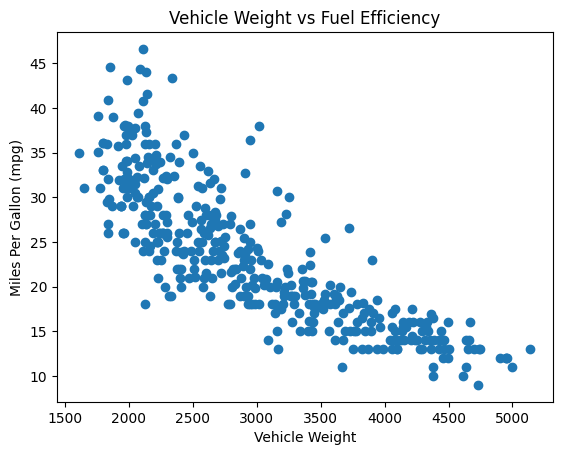

In [ ]:
plt.figure()
plt.scatter(df["weight"], df["mpg"])
plt.xlabel("Vehicle Weight")
plt.ylabel("Miles Per Gallon (mpg)")
plt.title("Vehicle Weight vs Fuel Efficiency")
plt.show()


There is a clear negative linear relationship — as vehicle weight increases, fuel efficiency decreases.

5. Split the dataset into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


6. Build a Simple Linear Regression model to predict mpg based on vehicle weight.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

7.Write the regression equation obtained from the model.


Regression Equation
mpg = intercept+ slope × weight

(Your exact values may differ slightly depending on split.)

8. Interpret the slope coefficient in the context of vehicle performance and fuel efficiency.

In [ ]:
intercept = model.intercept_
slope = model.coef_[0]

intercept, slope
print(f"intercept:", intercept)
print(f"slope:", slope)

intercept: 46.78206336645047
slope: -0.00780524235159488


For every 1-unit increase in vehicle weight, the fuel efficiency decreases by 0.0078 miles per gallon, assuming all other factors remain constant.

9. Evaluate the model performance using the following error metrics:
○ Mean Absolute Error (MAE)
○ Mean Squared Error (MSE)
○ Root Mean Squared Error (RMSE)
○ R2 Score

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("mae:" , mae)
print("mse:" , mse)
print("rmse:" , rmse)
print("r2:" , r2)


mae: 3.1177861992064573
mse: 14.894861064636194
rmse: 3.8593860994510765
r2: 0.722971057303075


Vehicle weight is a major contributing factor, but not sufficient on its own for accurate fuel efficiency prediction.

10.Analyze the results and comment on:

1 The strength of the relationship between vehicle weight and fuel efficiency
2 Whether vehicle weight alone is a suitable predictor of fuel efficiency

1.Strength of the Relationship Between Vehicle Weight and Fuel Efficiency

The simple linear regression model shows a strong negative relationship between vehicle weight and fuel efficiency.
The slope coefficient is –0.0078, indicating that fuel efficiency decreases as vehicle weight increases.

The R² value of 0.72 implies that approximately 72% of the variation in miles per gallon (mpg) is explained solely by vehicle weight. This indicates a strong linear association between the two variables. The scatter plot also supports this conclusion, showing a clear downward trend.

Thus, vehicle weight is a significant factor influencing fuel efficiency.

2.Suitability of Vehicle Weight as a Sole Predictor

Although vehicle weight is a strong predictor, it is not sufficient as the only independent variable.
Around 28% of the variation in mpg remains unexplained, which can be attributed to other factors such as:

Engine displacement

Horsepower

Aerodynamics

Transmission type

Fuel and engine technology

Therefore, vehicle weight alone provides a reasonable but incomplete prediction of fuel efficiency. A multiple linear regression model would be more appropriate for accurate real-world prediction.

11. Prepare a brief comparison report discussing:
11.1 Differences between MAE, MSE, and RMSE
11.2. Which error metric is most interpretable and why
11.3. Limitations of using a single independent variable

11.1 In the developed simple linear regression model, the following error values were obtained:

MAE = 3.12 mpg

MSE = 14.89 (mpg²)

RMSE = 3.86 mpg

The Mean Absolute Error (MAE) indicates that, on average, the predicted fuel efficiency differs from the actual value by about 3.12 miles per gallon. It provides a direct and easily understandable measure of prediction accuracy.

The Mean Squared Error (MSE) squares the prediction errors before averaging. As a result, larger errors are penalized more heavily, which explains the higher numerical value compared to MAE.

The Root Mean Squared Error (RMSE) is the square root of MSE and expresses the error in the same unit as mpg. The RMSE value of 3.86 mpg, which is higher than MAE, indicates the presence of some larger prediction errors in the model.



11.2 Among the three metrics, MAE is the most interpretable because it directly represents the average prediction error in miles per gallon. In this model, stating that predictions are off by approximately 3 mpg is intuitive and easy to communicate.

RMSE is also useful but is more sensitive to large errors, making it less straightforward for simple interpretation.

11.3 Limitations of Using a Single Independent Variable (Observed from Results)

Although the model achieved an R² value of 0.72, indicating that vehicle weight explains 72% of the variability in fuel efficiency, the remaining 28% of variation is unexplained. This clearly shows the limitation of using vehicle weight as the only predictor.

Fuel efficiency is influenced by multiple factors such as engine power, vehicle design, and technology. Therefore, relying on a single independent variable results in an incomplete model and limits predictive accuracy.

conclusion:
The obtained error metrics and R² value demonstrate that while vehicle weight is a strong predictor of fuel efficiency, a single-variable regression model is insufficient for capturing the full complexity of real-world automobile performance.


**QUESTION-2**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


1. Manually or programmatically create the dataset.

In [ ]:
np.random.seed(42)

n = 50

data = {
    "Area": np.random.randint(600, 3000, n),          # sq.ft
    "Bedrooms": np.random.randint(1, 6, n),
    "Bathrooms": np.random.randint(1, 4, n),
    "Age": np.random.randint(1, 30, n),                # years
    "Distance": np.random.randint(1, 25, n),           # km
}

df = pd.DataFrame(data)

# Create target variable (House Price in lakhs)
df["Price"] = (
    df["Area"] * 0.05 +
    df["Bedrooms"] * 10 +
    df["Bathrooms"] * 8 -
    df["Age"] * 1.5 -
    df["Distance"] * 2 +
    np.random.normal(0, 10, n)
)


In [ ]:
df.head(5)

,Area,Bedrooms,Bathrooms,Age,Distance,Price
0,1460,1,3,25,17,40.319791
1,1894,4,3,21,24,88.464564
2,1730,2,2,6,17,71.124186
3,1695,4,1,28,17,63.521861
4,2238,2,3,28,2,128.623191


2. Intentionally introduce missing values in at least two independent variables.

In [ ]:
df.loc[5:9, "Area"] = np.nan
df.loc[15:18, "Bathrooms"] = np.nan


3. Perform data preprocessing to:
○ Identify missing values
○ Handle missing values using appropriate techniques
(mean/median/imputation methods)

In [ ]:
df.isnull().sum()

,0
Area,5
Bedrooms,0
Bathrooms,4
Age,0
Distance,0
Price,0


In [ ]:
df["Area"] = df["Area"].fillna(df["Area"].mean())
df["Bathrooms"] = df["Bathrooms"].fillna(df["Bathrooms"].median())

In [ ]:
df.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Age,0
Distance,0
Price,0


4. Separate the dataset into:
 4.1 Independent variables
 4.2 Dependent variable (house price)


In [ ]:
X = df[["Area", "Bedrooms", "Bathrooms", "Age", "Distance"]]
y = df["Price"]


5. Split the dataset into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


6. Develop a Multiple Linear Regression model to predict house prices.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

8. Interpret the regression coefficients and identify:
 * The most influential factors
affecting house prices

In [ ]:
intercept = model.intercept_
coefficients = model.coef_

print("intercept:", intercept)
print("coefficients:", coefficients)

intercept: -2.1242549813387512
coefficients: [ 0.04822073  9.01899436 10.82400676 -1.03669324 -2.34563582]


The regression coefficients show how each factor affects house price while keeping others constant.
Area, number of bedrooms, and number of bathrooms have positive coefficients, indicating that larger houses with more rooms are priced higher.
Age of the house and distance from the city center have negative coefficients, meaning older houses and houses located farther from the city center tend to have lower prices.
Among all variables, number of bathrooms, bedrooms, and distance from the city center are the most influential factors affecting house prices.

7. Write the regression equation including all independent variables.

House Price=−2.12+0.048(Area)+9.02(Bedrooms)+10.82(Bathrooms)−1.04(Age)−2.35(Distance)

9. Evaluate the model using the following performance metrics:
 9.1. Mean Absolute Error (MAE)
 9.2. Mean Squared Error (MSE)
 9.3. Root Mean Squared Error (RMSE)
 9.4. R2 Score

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("mae:" , mae)
print("mse:" , mse)
print("rmse:" , rmse)
print("r2:" , r2)



mae: 10.166846924192985
mse: 213.14055348538812
rmse: 14.5993340082823
r2: 0.7723026853298779


The model achieved a MAE of 10.17, RMSE of 14.60, and an R² score of 0.77.
This indicates that the model predicts house prices with reasonable accuracy and explains 77% of the variation in house prices.
The difference between MAE and RMSE suggests the presence of some larger prediction errors.

10.Compare the error values and analyze:
1 Which metric penalizes large errors more
2 Which metric is easiest to interpret in real-world scenarios

MSE penalizes large errors more because errors are squared.
MAE is the easiest to interpret as it directly represents the average prediction error in real-world units.
Using a single metric is insufficient; therefore, multiple metrics are used together to better evaluate model performance